In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


In [176]:
## lets create datapoints
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2,n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

In [177]:
pd.DataFrame(X).head()

,0,1
0,1.225160,-0.951731
1,1.016304,-1.725175
2,0.335340,-1.724896
3,1.786348,-1.782653
4,1.016751,1.062569


In [178]:
pd.DataFrame(y).value_counts()

0
0    501
1    499
Name: count, dtype: int64

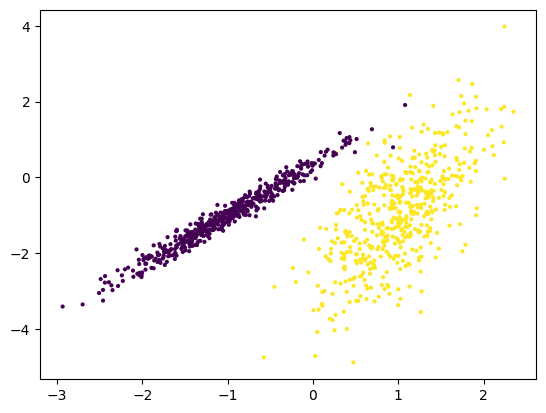

In [179]:
plt.scatter(pd.DataFrame(X)[0],pd.DataFrame(X)[1], c=y,s=4)

<Axes: xlabel='0', ylabel='1'>

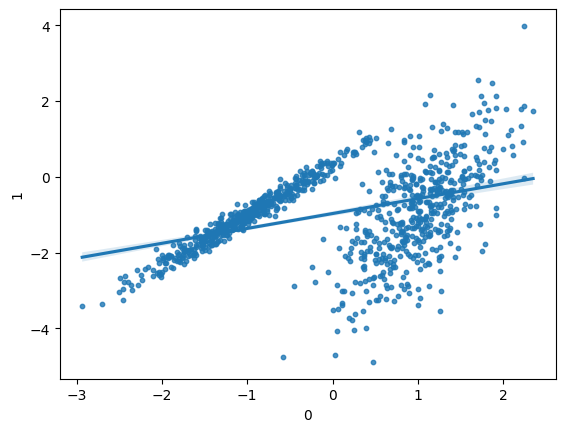

In [180]:
sns.regplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], fit_reg=True, scatter_kws={"s": 10})

In [181]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [182]:
clf.coef_

array([[ 3.39052534, -1.41008414]])

In [183]:
clf.intercept_

array([-0.99847679])

In [184]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X)
accuracy_score(y, y_pred)*100

99.6

/tmp/ipykernel_2159/2802477019.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1], [-(clf.intercept_[0]+clf.coef_[0][0]*0)/clf.coef_[0][1], -(clf.intercept_[0]+clf.coef_[0][0]*1)/clf.coef_[0][1]], 'k-', color='r')


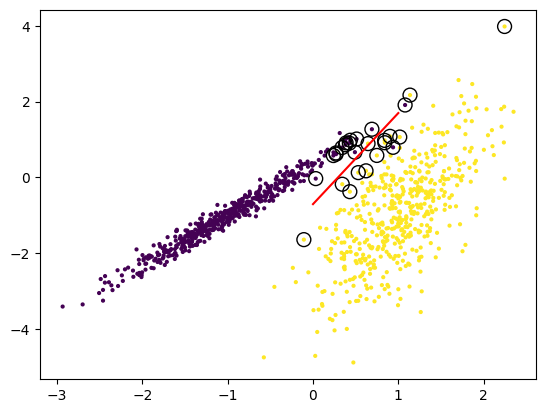

In [185]:
plt.scatter(pd.DataFrame(X)[0],pd.DataFrame(X)[1], c=y,s=4)
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], s=100, facecolors='none', edgecolors='k')
plt.plot([0,1], [-(clf.intercept_[0]+clf.coef_[0][0]*0)/clf.coef_[0][1], -(clf.intercept_[0]+clf.coef_[0][0]*1)/clf.coef_[0][1]], 'k-', color='r')



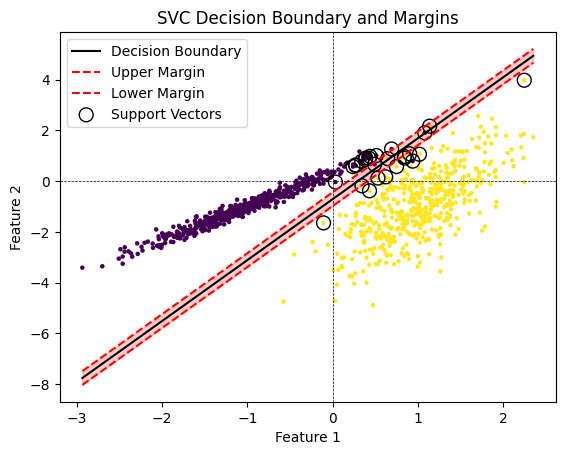

In [186]:
svc = clf
# . Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=5)

# . Get the coefficients and intercepts
w = svc.coef_[0]  # Weight vector
b = svc.intercept_[0]  # Intercept
x0 = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)

# Decision boundary: w0 * x + w1 * y + b = 0 => y = -(w0/w1) * x - b/w1
y0 = -(w[0] / w[1]) * x0 - b / w[1]

# Margins: ±1 margins
margin = 1 / np.sqrt(np.sum(w**2))
y_up = y0 + margin
y_down = y0 - margin

# . Plot decision boundary and margins
plt.plot(x0, y0, 'k-', label='Decision Boundary')
plt.plot(x0, y_up, 'r--', label='Upper Margin')
plt.plot(x0, y_down, 'r--', label='Lower Margin')
plt.fill_between(x0, y_up, y_down, color='r', alpha=0.2)
plt.axhline(0, color='k', ls='--', lw=0.5)
plt.axvline(0, color='k', ls='--', lw=0.5)
# . Highlight support vectors
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# . Add labels and legend
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVC Decision Boundary and Margins')
plt.show()

In [187]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(X, y)

SVC()

In [188]:
clf.score(X,y)*100

99.6

In [189]:
clf = SVC(kernel='sigmoid', C=1)
clf.fit(X, y)
clf.score(X,y)*100

93.5

In [205]:
clf = SVC(kernel='poly', C=1)
clf.fit(X, y)
clf.score(X,y)*100

86.1

### SVC with random data

In [191]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt


In [192]:
X = []
for i in range(1000):
    X.append([rnd.uniform(-1,1),rnd.uniform(-1,1)])
X = np.array(X)
y = []
for i in range(1000):
    if X[i][1] > X[i][0]**2:
        y.append(1)
    else:
        y.append(-1)
y = np.array(y)
print(X.shape,y.shape)

(1000, 2) (1000,)


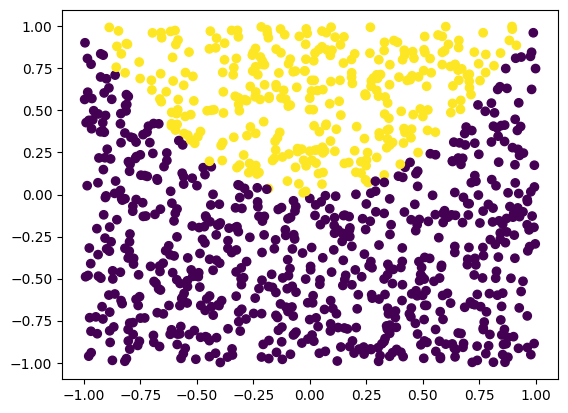

In [193]:
plt.scatter(X[:,0],X[:,1],c=y)

In [194]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

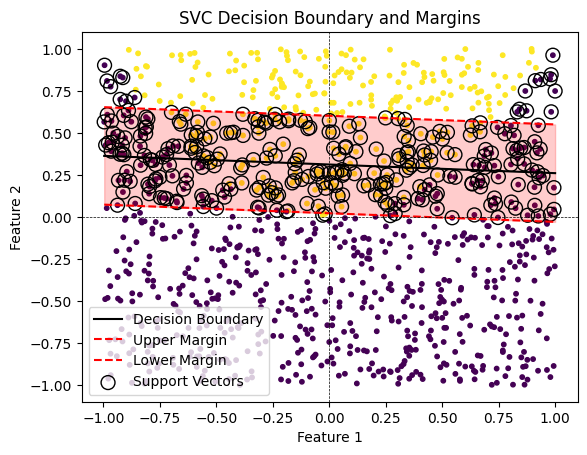

In [195]:
svc = clf
# . Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)

# . Get the coefficients and intercepts
w = svc.coef_[0]  # Weight vector
b = svc.intercept_[0]  # Intercept
x0 = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)

# Decision boundary: w0 * x + w1 * y + b = 0 => y = -(w0/w1) * x - b/w1
y0 = -(w[0] / w[1]) * x0 - b / w[1]

# Margins: ±1 margins
margin = 1 / np.sqrt(np.sum(w**2))
y_up = y0 + margin
y_down = y0 - margin

# . Plot decision boundary and margins
plt.plot(x0, y0, 'k-', label='Decision Boundary')
plt.plot(x0, y_up, 'r--', label='Upper Margin')
plt.plot(x0, y_down, 'r--', label='Lower Margin')
plt.fill_between(x0, y_up, y_down, color='r', alpha=0.2)
plt.axhline(0, color='k', ls='--', lw=0.5)
plt.axvline(0, color='k', ls='--', lw=0.5)
# . Highlight support vectors
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# . Add labels and legend
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVC Decision Boundary and Margins')
plt.show()

In [196]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X)
accuracy_score(y,y_pred)*100

86.5

### LOGISTSTIC REG on same data

In [197]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
lr.fit(X_train, y_train)

LogisticRegression()

In [198]:
y_pred = lr.predict(X_test)

In [199]:
lr.score(X_test, y_test)*100

87.33333333333333

In [200]:
from sklearn.metrics import confusion_matrix

In [201]:
confusion_matrix(y_test, y_pred)

array([[184,  21],
       [ 17,  78]])

NameError: name 'pl' is not defined

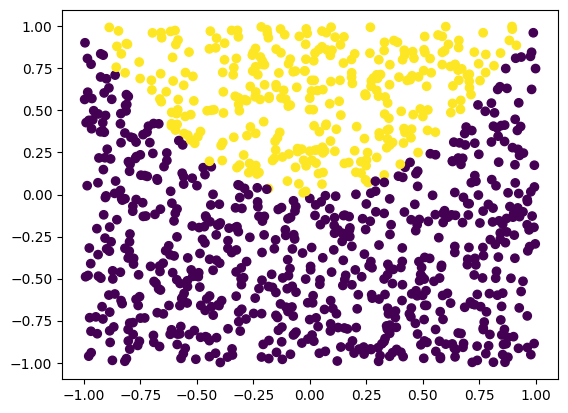

In [202]:
plt.scatter(X[:,0],X[:,1],c=y)
pl


/tmp/ipykernel_2159/2130194091.py:12: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='r', marker='x', label='Test data')


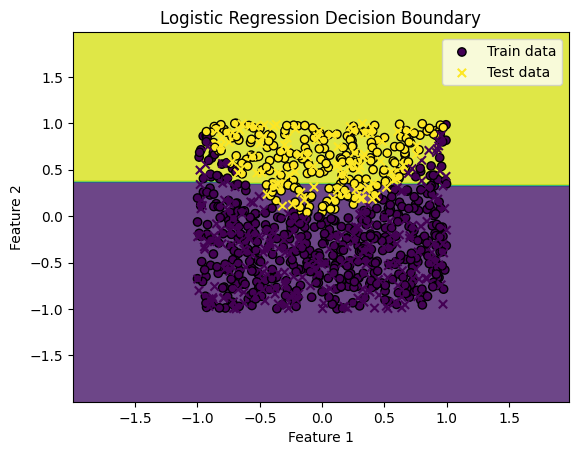

In [62]:
# Plot decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Train data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='r', marker='x', label='Test data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

## linear regression on same data

In [63]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred = slr.predict(X_test)

In [64]:
slr.score(X_test, y_test)*100

51.59062960429153

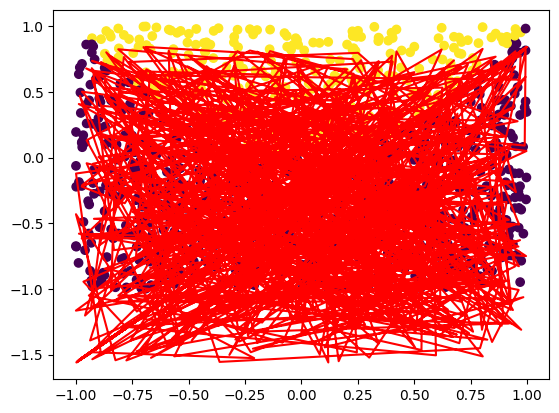

In [75]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(X_train, slr.predict(X_train) , color='red', label='Regression Line')


In [76]:
## ridge regression, lasso regression, elastic net regression


In [77]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
Ridge = Ridge(alpha=0.1)
Ridge.fit(X_train, y_train)
Lasso = Lasso(alpha=0.1)
Lasso.fit(X_train, y_train)
ElasticNet = ElasticNet(alpha=0.1, l1_ratio=0.5)
ElasticNet.fit(X_train, y_train)
Ridge.score(X_test, y_test)*100,Lasso.score(X_test, y_test)*100,ElasticNet.score(X_test, y_test)*100

(51.595473387711785, 50.13621062149869, 50.40004355668486)